# Assignment II
Machine Learning II

Wali Ullah (09745)


The ROC curve and AUC shows how well the classifier works. It can be used for both binary and multi-class classification problems.
The ROC is a graph displaying a classifier's performance for all possible thresholds. The graph is plotted between the true positive rate (on the Y-axis) and the false Positive rate (on the x-axis). 
The AUC (Area Under the Curve) presents the summary of ROC curve. The value ranges from 0 to one. A higher AUC represents that the model performs better to classify the positive and negative classes.

In a ROC curve, a higher X-axis value indicates a higher number of False positives than True negatives. While a higher Y-axis value indicates a higher number of True positives than False negatives. So, the choice of the threshold depends on the ability to balance between False positives and False negatives.



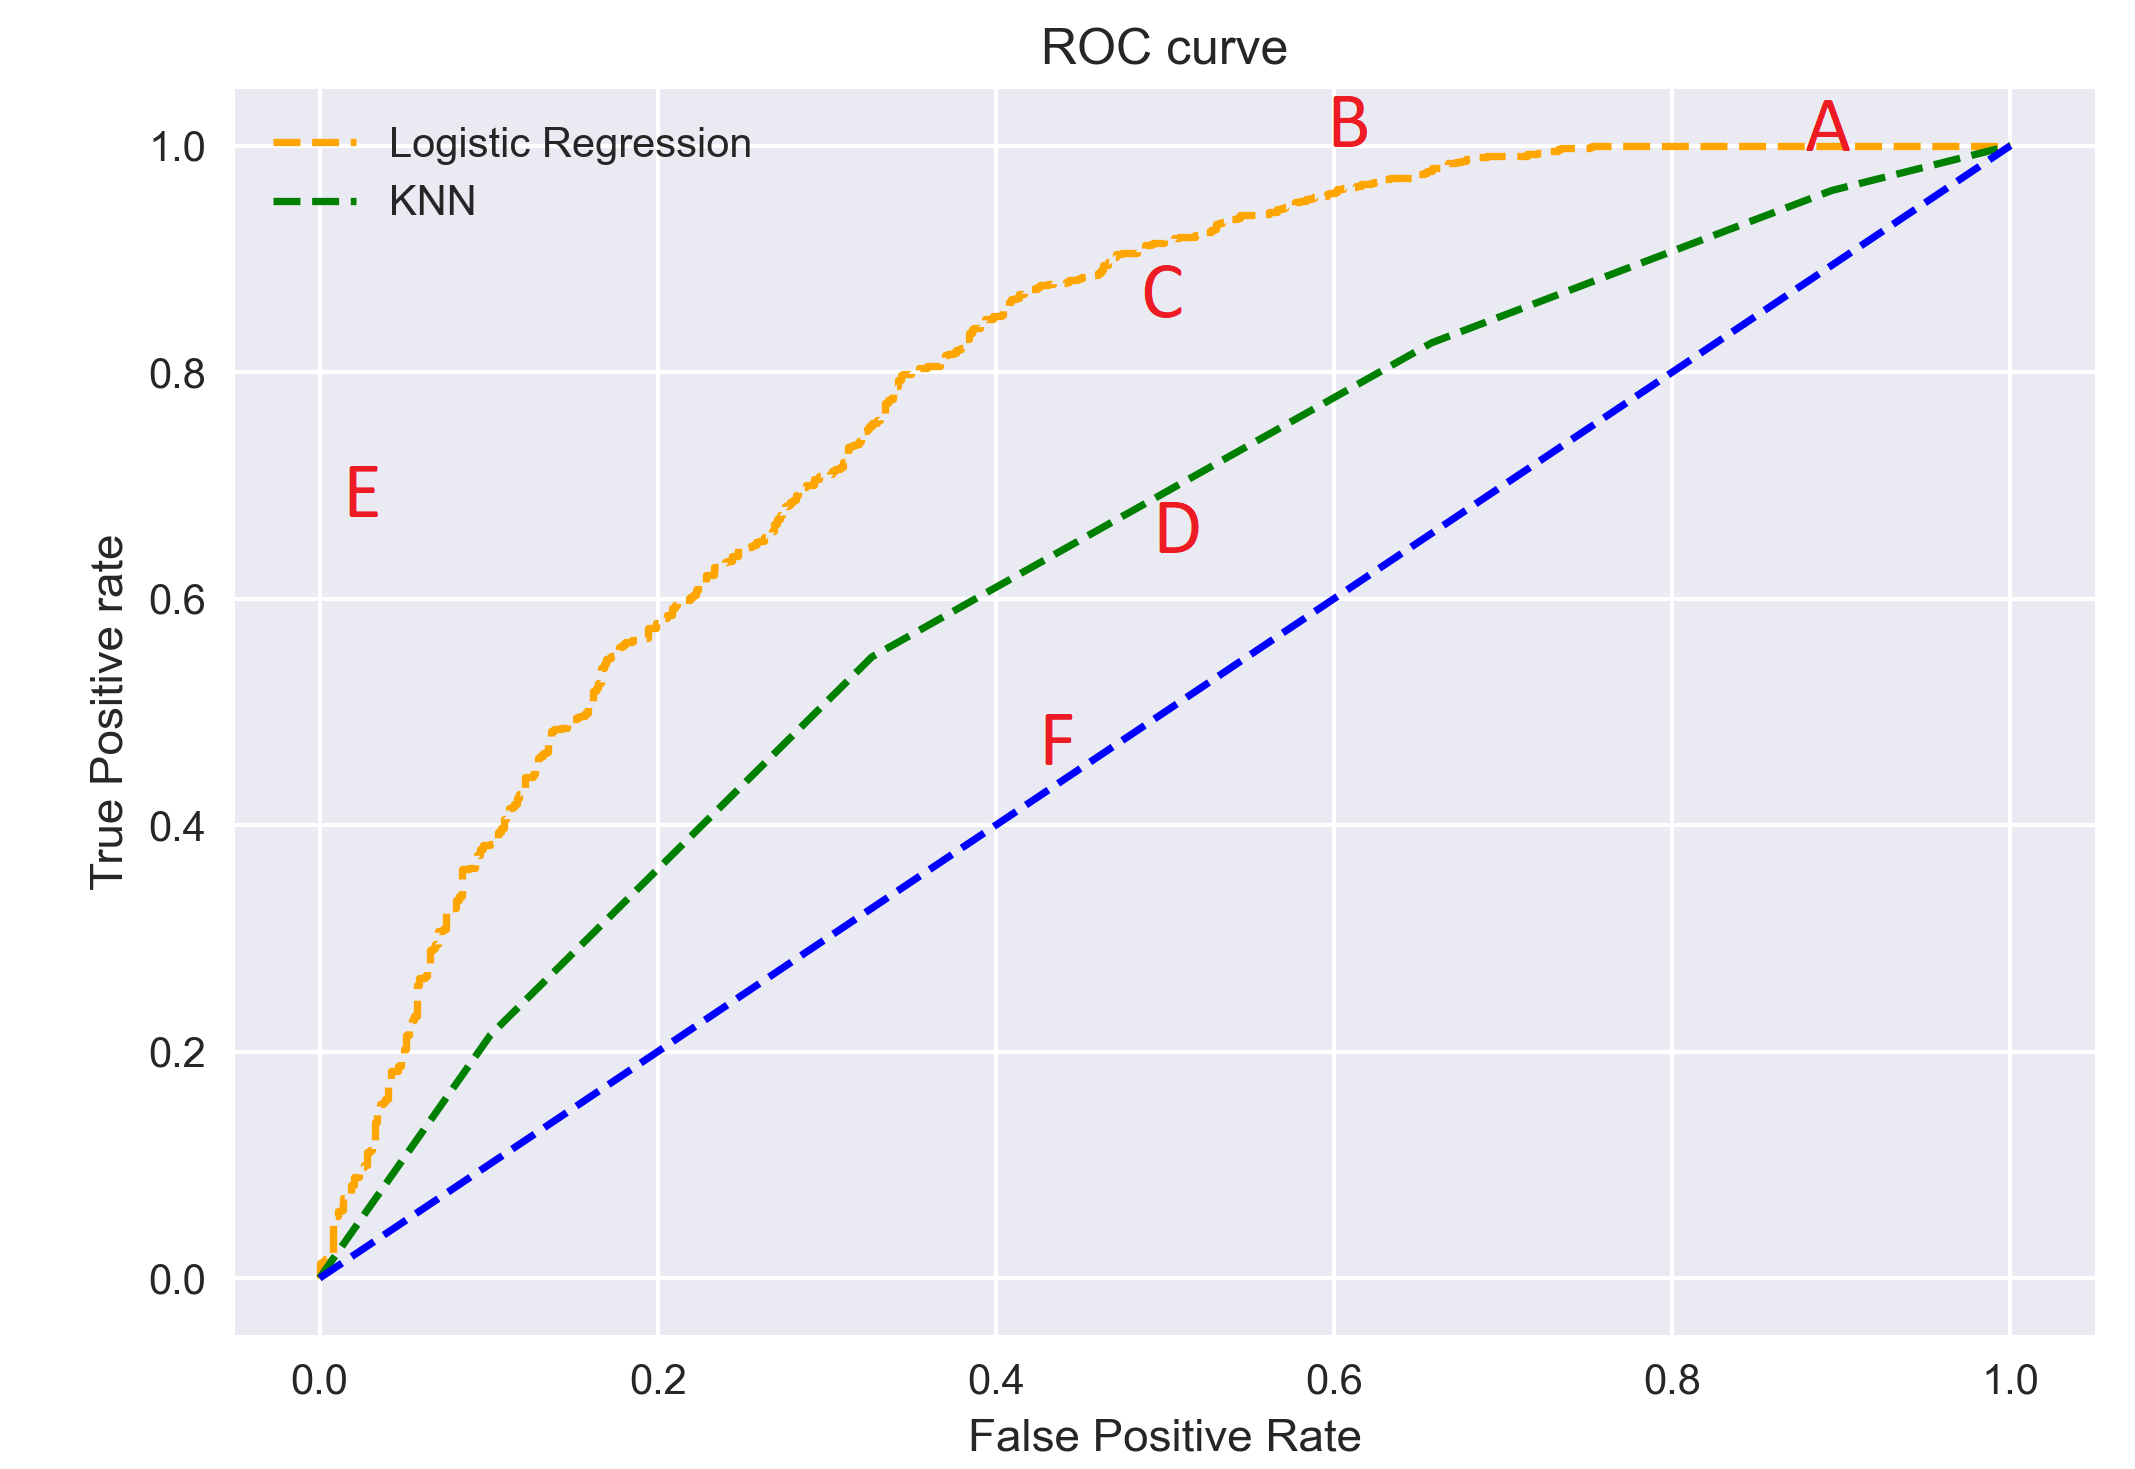

On the 45-degree line (point F), all points above this line correspond to the situation where the proportion of correctly classified points belonging to the Positive class is greater than the proportion of incorrectly classified points belonging to the Negative class.

Points at Extreme Right (i.e. point A)

At the extreme right top point (points in region A) is where the Sensitivity is the highest and Specificity the lowest. This means all the Positive class points are classified correctly and all the Negative class points are classified incorrectly. Here, any point on the blue line corresponds to a situation where True Positive Rate is equal to False Positive Rate.

Points on Right (i.e. point B)
Points in region B have the same Sensitivity as Point A, however, it has a higher Specificity. Meaning the number of incorrectly Negative class points is lower compared to the previous threshold. This indicates that this threshold is better than the previous one.

Points in Middle Section

Between points C and D, the Sensitivity at point C is higher than point D for the same Specificity. This means, for the same number of incorrectly classified Negative class points, the classifier predicted a higher number of Positive class points. Therefore, the threshold at point C is better than point D.

Now, depending on how many incorrectly classified points we want to tolerate for our classifier, we would choose between point B or C for predicting whether you can defeat me in PUBG or not.

Point on vertical axis (i.e. Point E)
Points in region E have highest Specificity. Meaning there are no False Positives classified by the model. The model can correctly classify all the Negative class points.
The top-left corner of the ROC graph corresponding to the coordinate (0, 1) in the cartesian plane. It is here that both, the Sensitivity and Specificity, would be the highest and the classifier would correctly classify all the Positive and Negative class points.



Similarly, when AUC = 1, then the classifier can perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives. When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier can detect more numbers of True positives and True negatives than False negatives and False positives.
When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points.
So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.


# ROC and AUC for Binary Class (Label)

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
#df = pd.read_csv('C:\\Users\\waliullah\\Desktop\\ML-II\\Assignment2\\finaldata.csv')
df = pd.read_csv('finaldata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5170 entries, 0 to 5169
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   ch_alive                  5170 non-null   int64
 1   age                       5170 non-null   int64
 2   age_mf_birth              5170 non-null   int64
 3   preceding_birth_interval  5170 non-null   int64
 4   succ_ birth_interval      5170 non-null   int64
 5   number_pregnancy_losses   5170 non-null   int64
 6   poorest                   5170 non-null   int64
 7   poor                      5170 non-null   int64
 8   middle                    5170 non-null   int64
 9   rich                      5170 non-null   int64
 10  richest                   5170 non-null   int64
 11  gender                    5170 non-null   int64
dtypes: int64(12)
memory usage: 484.8 KB


In [3]:
df

,ch_alive,age,age_mf_birth,preceding_birth_interval,succ_ birth_interval,number_pregnancy_losses,poorest,poor,middle,rich,richest,gender
0,0,180,20,28,24,1,1,0,0,0,0,1
1,0,41,18,26,28,0,0,1,0,0,0,1
2,0,149,19,22,16,1,0,1,0,0,0,1
3,0,226,19,20,17,1,1,0,0,0,0,1
4,0,122,18,20,12,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5165,1,102,20,10,10,0,1,0,0,0,0,1
5166,1,92,18,16,14,1,0,1,0,0,0,1
5167,1,211,17,20,26,1,1,0,0,0,0,1
5168,1,90,25,25,58,0,1,0,0,0,0,0


(5170, 12)
['ch_alive', 'age', 'age_mf_birth', 'preceding_birth_interval', 'succ_ birth_interval', 'number_pregnancy_losses', 'poorest', 'poor', 'middle', 'rich', 'richest', 'gender']


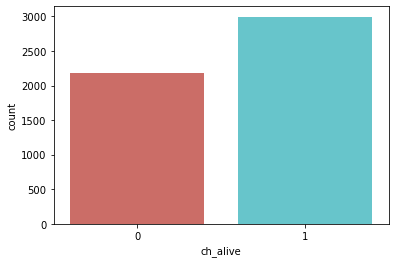

In [4]:
print(df.shape)
print(list(df.columns))

# to Check the Class Balance
sns.countplot(x='ch_alive', data=df, palette='hls')
plt.show()

In [5]:
# to Check the Class Balance
count_no_sub = len(df[df['ch_alive']==0])
count_sub = len(df[df['ch_alive']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 42.0889748549323
percentage of subscription 57.9110251450677


Both Classes seems balance. 57% are the cases where label is zero and 42% are ones. So there is no need for calss balancing.

In [6]:
X = df.loc[:, df.columns != 'ch_alive']
y = df.loc[:, df.columns == 'ch_alive']

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

On this dataset, we are employing two classifiers to test the performance 

In [7]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn model
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

C:\Users\waliullah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\waliullah\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\waliullah\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), fo

Sklearn has a very potent method roc_curve() which computes the ROC for your classifier in a matter of seconds! It returns the FPR, TPR, and threshold values:

In [8]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

The AUC score can be computed using the roc_auc_score() method of sklearn:

In [9]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.792583292797391 0.6393557183083154


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
print('*****************************************')
print('Logistic Regression')
print('*****************************************')
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))
print('*****************************************')
print('KNN')
print('*****************************************')
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print('*****************************************')


*****************************************
Logistic Regression
*****************************************
[[310 333]
 [ 73 835]]
              precision    recall  f1-score   support

           0       0.81      0.48      0.60       643
           1       0.71      0.92      0.80       908

    accuracy                           0.74      1551
   macro avg       0.76      0.70      0.70      1551
weighted avg       0.75      0.74      0.72      1551

*****************************************
KNN
*****************************************
[[433 210]
 [410 498]]
              precision    recall  f1-score   support

           0       0.51      0.67      0.58       643
           1       0.70      0.55      0.62       908

    accuracy                           0.60      1551
   macro avg       0.61      0.61      0.60      1551
weighted avg       0.62      0.60      0.60      1551

*****************************************


plot the ROC curves for the two algorithms

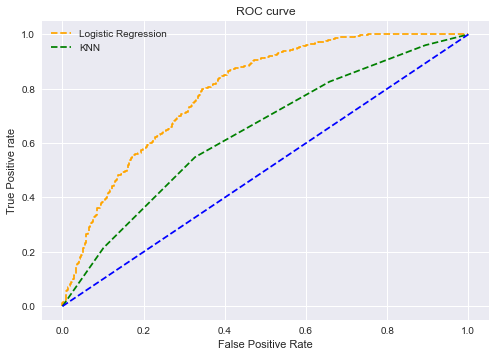

In [11]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

It is evident from the plot that the AUC for the Logistic Regression ROC curve is higher than that for the KNN ROC curve. Therefore, we can say that logistic regression did a better job of classifying the positive class in the dataset.

# ROC and AUC for Multi-Class (Label)

Like I said before, the AUC-ROC curve is only for binary classification problems. But we can extend it to multiclass classification problems by using the One vs All technique.

So, if we have three classes 0, 1, and 2, the ROC for class 0 will be generated as classifying 0 against not 0, i.e. 1 and 2. The ROC for class 1 will be generated as classifying 1 against not 1, and so on.

The ROC curve for multi-class classification models can be determined as below:

In [12]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

df = pd.read_csv('iris.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['species']= label_encoder.fit_transform(df['species'])
  
df['species'].unique()

array([0, 1, 2])

In [14]:
X = df.loc[:, df.columns != 'species']
y = df.loc[:, df.columns == 'species']
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [15]:

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

Using Logistic Regression for Multi-Class Label

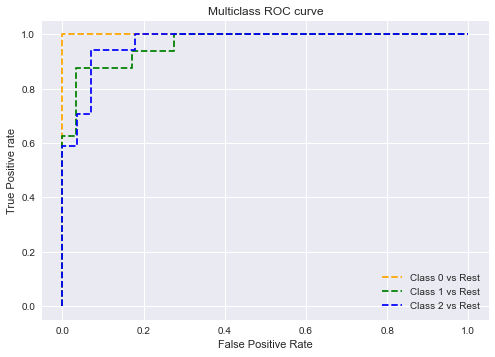

In [16]:
# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    


# Using KNN for Multi-Class Label

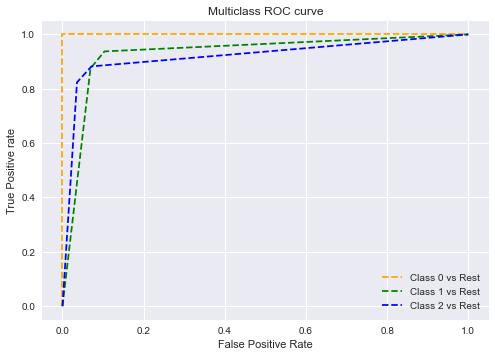

In [17]:
# fit model
clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=2))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    


